In [38]:
# Necessary Modules

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [29]:
# create dataframe
file=pd.read_csv('Customer_Churn.csv')

In [30]:
# check df
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# df stats
file.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
# check empty values
file.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
# check column data types
file.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
print("Unique values in 'Churn':", file['Churn'].unique())
print("Unique values in 'gender':", file['gender'].unique())
print("Unique values in 'Partner':", file['Partner'].unique())
print("Unique values in 'Dependents':", file['Dependents'].unique())
print("Unique values in 'PhoneService':", file['PhoneService'].unique())
print("Unique values in 'MultipleLines':", file['MultipleLines'].unique())
print("Unique values in 'InternetService':", file['InternetService'].unique())
print("Unique values in 'OnlineSecurity':", file['OnlineSecurity'].unique())
print("Unique values in 'OnlineBackup':", file['OnlineBackup'].unique())
print("Unique values in 'DeviceProtection':", file['DeviceProtection'].unique())
print("Unique values in 'TechSupport':", file['TechSupport'].unique())
print("Unique values in 'StreamingTV':", file['StreamingTV'].unique())
print("Unique values in 'StreamingMovies':", file['StreamingMovies'].unique())
print("Unique values in 'Contract':", file['Contract'].unique())
print("Unique values in 'PaperlessBilling':", file['PaperlessBilling'].unique())
print("Unique values in 'PaymentMethod':", file['PaymentMethod'].unique())

Unique values in 'Churn': ['No' 'Yes']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values in 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in 'PaperlessBilling': ['Yes' 'No']
Unique values in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic

In [35]:
# Mappings

# churn
churn_mapping={'Yes':1,'No':0}
chu_map=file.Churn.map(churn_mapping)
file['Churn']=chu_map

# gender
gender_mapping={'Male':1,'Female':0}
gen_map=file.gender.map(gender_mapping)
file.gender=gen_map

# partner
partner_mapping={'Yes':1,'No':0}
par_map=file.Partner.map(partner_mapping)
file['Partner']=par_map

# dependents
dependents_mapping={'Yes':1,'No':0}
dep_map=file.Dependents.map(dependents_mapping)
file['Dependents']=dep_map

# Phone service
phone_service_mapping={'Yes':1,'No':0}
ph_se_map=file.PhoneService.map(phone_service_mapping)
file.PhoneService=ph_se_map

# multiple lines
multiple_lines_mapping={'Yes':1,'No':0,'No phone service':2}
mu_li_map=file.MultipleLines.map(multiple_lines_mapping)
file.MultipleLines=mu_li_map

# internet service
internet_service_mapping={'DSL':0,'Fiber optic':1,'No':2}
in_se_map=file.InternetService.map(internet_service_mapping)
file.InternetService=in_se_map

# online security
online_security__mapping={'Yes':1,'No':0,'No internet service':2}
on_se_map=file.OnlineSecurity.map(online_security__mapping)
file.OnlineSecurity=on_se_map

# online backup
online_backup_mapping={'Yes':1,'No':0,'No internet service':2}
on_ba_map=file.OnlineBackup.map(online_backup_mapping)
file.OnlineBackup=on_ba_map

# device protection
device_protection_mapping={'Yes':1,'No':0,'No internet service':2}
de_pr_map=file.DeviceProtection.map(device_protection_mapping)
file.DeviceProtection=de_pr_map

# tech support
tech_support_mapping={'Yes':1,'No':0,'No internet service':2}
te_su_map=file.TechSupport.map(tech_support_mapping)
file.DeviceProtection=de_pr_map

# streaming tv
streaming_tv_mapping={'Yes':1,'No':0,'No internet service':2}
st_tv_map=file.StreamingTV.map(streaming_tv_mapping)
file.StreamingTV=st_tv_map

# streaming movies
streaming_movies_mapping={'Yes':1,'No':0,'No internet service':2}
st_mo_map=file.StreamingMovies.map(streaming_movies_mapping)
file.StreamingMovies=st_mo_map

# contract
contract_mapping={'Month-to-month':0,'One year':1,'Two year':2}
co_map=file.Contract.map(contract_mapping)
file.Contract=co_map

# paperless billing
paperless_billing_mapping={'Yes':1,'No':0}
pa_bi_map=file.PaperlessBilling.map(paperless_billing_mapping)
file.PaperlessBilling=pa_bi_map

# payment method
payment_method_mapping={'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3}
pa_me_map=file.PaymentMethod.map(payment_method_mapping)
file.PaymentMethod=pa_me_map


In [36]:
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,0,0,...,0,No,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,No,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,No,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,0,1,...,1,Yes,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,No,0,0,0,1,0,70.70,151.65,1



Correlation with 'Churn':
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
OnlineBackup       -0.291449
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


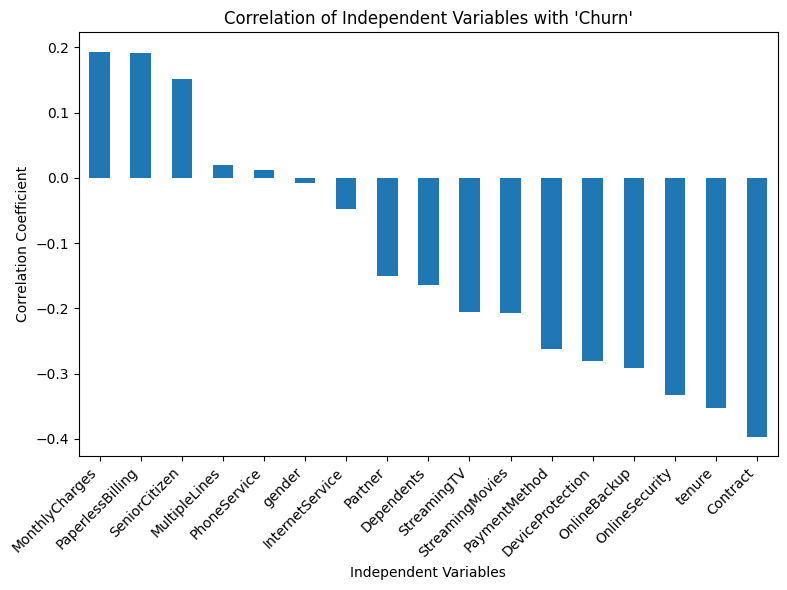

In [40]:
#correlation matrix

def check_churn_correlation(df):
    if 'Churn' not in df.columns:
        print("Error: 'Churn' column not found in the DataFrame.")
        return
    numeric_df = df.select_dtypes(include=['number'])
    if numeric_df.empty:
        print("Warning: DataFrame contains no numeric columns.")
        return
    if 'Churn' not in numeric_df.columns:
        print("Warning: 'Churn' column is not numeric.")
        return
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    # Extract the correlation with the 'Churn' column
    churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
    print("\nCorrelation with 'Churn':")
    print(churn_correlation)

    # Visualize the correlation with 'Churn' using a bar plot
    plt.figure(figsize=(8, 6))
    churn_correlation.drop('Churn').plot(kind='bar') # Drop 'Churn' itself from the plot
    plt.title("Correlation of Independent Variables with 'Churn'")
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Independent Variables")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

check_churn_correlation(file)

In [ ]:
# gender
sb.countplot(x=gen_map, hue=chu_map, data=file)

In [ ]:
# senior citizen
sb.countplot(x=file.SeniorCitizen,hue=chu_map)

In [ ]:
# tenure
sb.lineplot(x=file.tenure,y=chu_map)

In [ ]:
#  Phone service
sb.countplot(x=ph_se_map,hue=chu_map)

In [ ]:
# multiple lines
sb.countplot(x=mu_li_map,hue=chu_map)

In [ ]:
# internet service
sb.countplot(x=in_se_map,hue=chu_map)

In [ ]:
# contract
sb.countplot(x=co_map,hue=chu_map)

In [ ]:
# monthly charges
sb.lineplot(x=chu_map,y=file.MonthlyCharges)

In [ ]:
X=file.drop(columns=['customerID','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','TotalCharges','Churn']).astype('float64')
y=file.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
reg=LogisticRegression(random_state=42)
reg.fit(X_train,y_train)


In [ ]:
log_reg_val_pred=reg.predict(X_test)
accuracy_score(log_reg_val_pred,y_test)

In [ ]:
tr=DecisionTreeClassifier(random_state=42)
tr.fit(X_train,y_train)

In [ ]:
dt_val_pred=tr.predict(X_test)
accuracy_score(dt_val_pred,y_test)

In [ ]:
sv=svm.SVC(kernel='linear',random_state=42)
sv.fit(X_train,y_train)

In [ ]:
sv_val_pred=sv.predict(X_test)
accuracy_score(sv_val_pred,y_test)